# Ex 2
Write a generator for sub-Gaussian random vector

## sub-gaussian in general sub-stable) vector

Vector $X$ has sub-sub-Gaussian distribution if 

\begin{gather}
    X = \sqrt A [G_1,\dots ,G_d], \\
    A \sim S_{\alpha/2}(\beta = 1, \gamma = (\cos(\frac{\pi \alpha}{4}))^{\frac{\alpha}{2}},\delta = 0\\
    G_i \text{ i.i.d } N(0,\sigma^2)
\end{gather}
$X$ is also $\alpha$-stable vector with continious spectral measure $\Gamma$. In case of i.i.d. $G_1, \dots, G_d$ and $\Gamma$ is unifo
When $G_1, \dots, G_d$ anr not ind. then $\Gamma$ is not uniform.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from basic_units import radians, degrees, cos

sns.set()
pi = np.pi

In [63]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)
    
def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type = 1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type ==0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")

In [66]:
def sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha/2, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigma, size)

In [67]:
alpha = 1.6
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
A = stable_random_variables(alpha/2, beta, gamma, delta)
sigma = 1
d = 2
n = 10000

X_2  = sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size = [n, d])

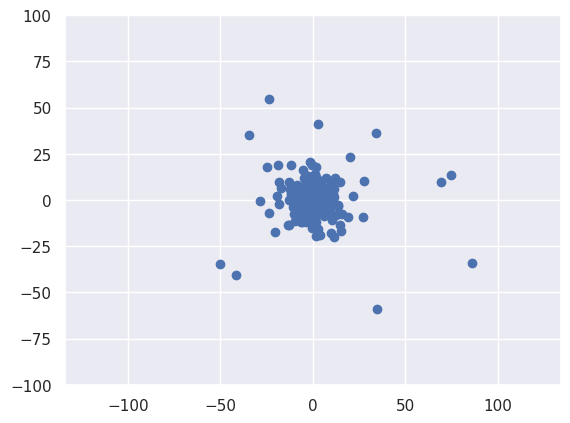

In [15]:
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.axis("equal")
lim = 100
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

In [43]:
mask = np.sqrt(X_2[:, 0]**2 + X_2[:, 1]**2) < 20
X_2_mask = X_2[mask]
x = X_2_mask[:, 0]
y = X_2_mask[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
ns  = 150j
xx, yy = np.mgrid[xmin:xmax:ns, ymin:ymax:ns]

-22.61961056255686 19.291616659068396 -23.637795058751237 23.094882523980253


In [44]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

(-3.0, 3.0)

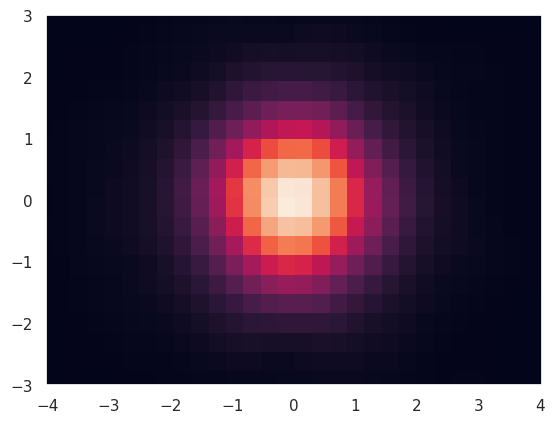

In [46]:
plt.pcolormesh(xx, yy, f)
lim = 3
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

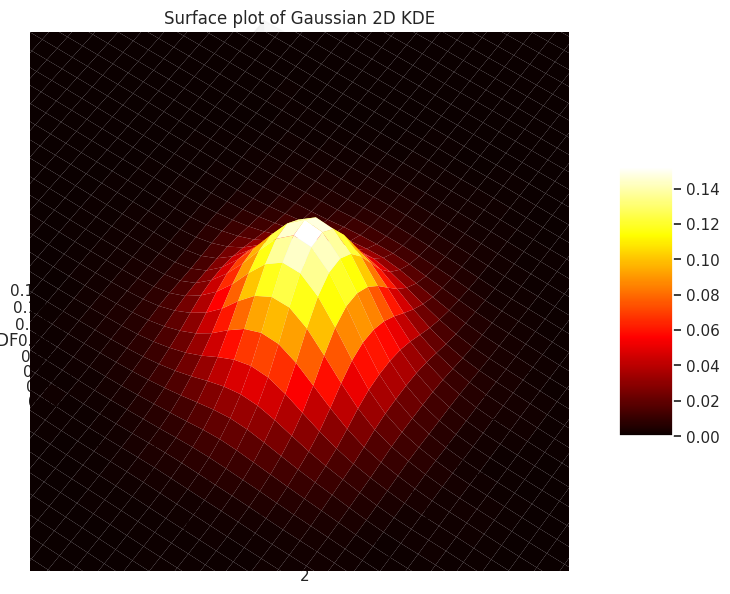

In [49]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 2.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

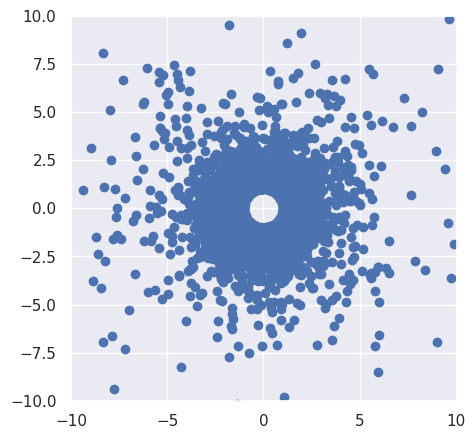

In [52]:
r = 1
r_k = np.sqrt(np.sum(np.power(X_2, 2),1))
# X_1_c_mask = X_1_c[ r_k > r]
X_2_mask = X_2[ r_k > r]

fig,ax=plt.subplots(1, figsize=(5, 5))
ax.scatter(X_2_mask[:,0], X_2_mask[:,1])
lim  = 10
plt.axis('equal')
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])

plt.show()


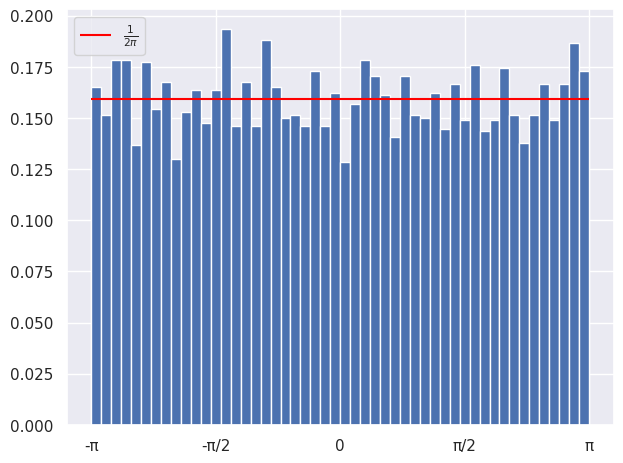

In [53]:
fig,ax=plt.subplots(1)

ax.hist(np.arctan2(X_2_mask[:,0], X_2_mask[:,1]) , xunits = radians, density= True, bins =50)
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])

fig.tight_layout()
plt.hlines(1/(2*pi) ,-pi, pi, colors= "red", label="$\\frac{1}{2\\pi}$")
plt.legend()
plt.show()